# EDA - VMLU MQA v1.5 Dataset

Notebook này phân tích dataset **VMLU (Vietnamese Multi-task Language Understanding)** cho cuộc thi **Hội thi Kỹ thuật AI 2025**.

Dataset gồm 3 files:
- **dev.json**: Development set (có đáp án, dùng để train)
- **valid.json**: Validation set (có đáp án, dùng để validate)
- **test.json**: Test set (KHÔNG có đáp án, dùng để nộp bài)

In [13]:
# Import thư viện cần thiết
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✅ Import thành công!")

✅ Import thành công!


## 1. Load Dataset

In [14]:
# Load 3 files JSON
with open('../data/vmlu_mqa_v1.5/dev.json', 'r', encoding='utf-8') as f:
    dev_data = json.load(f)

with open('../data/vmlu_mqa_v1.5/valid.json', 'r', encoding='utf-8') as f:
    valid_data = json.load(f)

with open('../data/vmlu_mqa_v1.5/test.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

print(f"📊 Dev set: {len(dev_data)} samples")
print(f"📊 Valid set: {len(valid_data)} samples")
print(f"📊 Test set: {len(test_data)} samples")
print(f"📊 TỔNG: {len(dev_data) + len(valid_data) + len(test_data)} samples")

📊 Dev set: 303 samples
📊 Valid set: 744 samples
📊 Test set: 9833 samples
📊 TỔNG: 10880 samples


## 2. Xem cấu trúc dữ liệu

In [15]:
# Xem sample từ dev set
print("=" * 80)
print("SAMPLE TỪ DEV SET (có đáp án):")
print("=" * 80)
sample = dev_data[0]
print(f"ID: {sample['id']}")
print(f"\nCâu hỏi: {sample['question']}")
print(f"\nCác lựa chọn:")
for choice in sample['choices']:
    print(f"  {choice}")
print(f"\n✅ Đáp án đúng: {sample['answer']}")

print("\n" + "=" * 80)
print("SAMPLE TỪ TEST SET (KHÔNG có đáp án):")
print("=" * 80)
sample_test = test_data[0]
print(f"ID: {sample_test['id']}")
print(f"\nCâu hỏi: {sample_test['question']}")
print(f"\nCác lựa chọn:")
for choice in sample_test['choices']:
    print(f"  {choice}")
print(f"\n❌ Đáp án: KHÔNG CÓ (dùng để nộp bài)")

SAMPLE TỪ DEV SET (có đáp án):
ID: 28-0001

Câu hỏi: Nếu GDP bình quân thực tế của năm 2000 là 18,073$ và GDP bình quân thực tế của năm 2001 là 18,635$ thì tỷ lệ tăng trưởng của sản lượng thực tế trong thời kỳ này là bao nhiêu?

Các lựa chọn:
  A. 3.0%
  B. 3.1%
  C. 5.62%
  D. 18.0%
  E. 18.6%

✅ Đáp án đúng: B

SAMPLE TỪ TEST SET (KHÔNG có đáp án):
ID: 28-0021

Câu hỏi: Một nền kinh tế trong trạng thái toàn dụng nhân công có nghĩa là:

Các lựa chọn:
  A. Không còn lạm phát nhưng có thể còn thất nghiệp
  B. Không còn thất nghiệp nhưng có thể còn lạm phát
  C. Không còn thất nghiệp và không còn lạm phát
  D. Vẫn còn một tỷ lệ lạm phát và tỷ lệ thất nghiệp nhất định

❌ Đáp án: KHÔNG CÓ (dùng để nộp bài)


## 3. Phân tích số lượng lựa chọn (A/B/C/D/E...)

Số lượng lựa chọn trong mỗi câu hỏi:
Dev - Min: 3, Max: 5, Mean: 3.96
Valid - Min: 3, Max: 4, Mean: 3.96
Test - Min: 3, Max: 5, Mean: 3.98


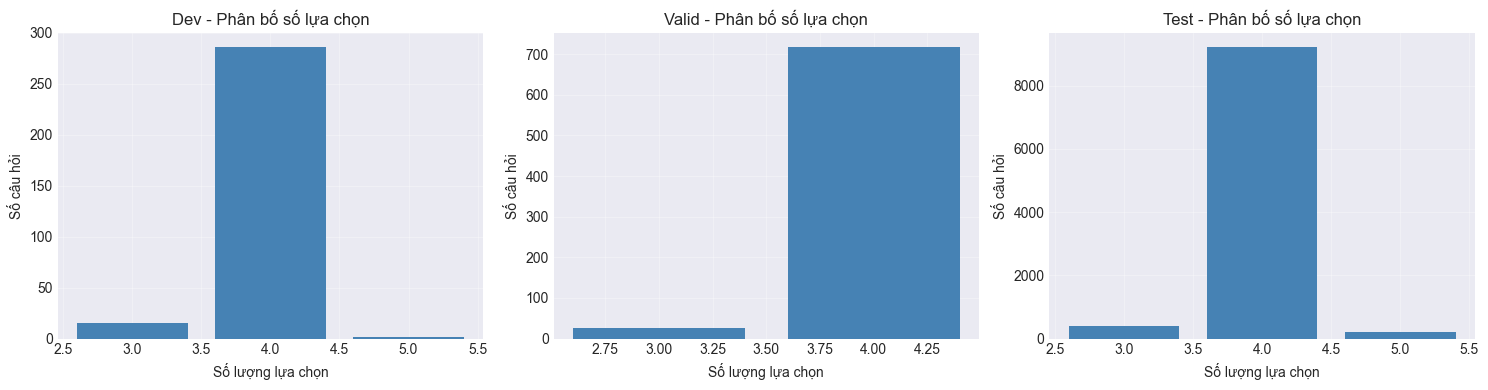

In [16]:
# Đếm số lượng choices trong mỗi câu hỏi
def count_choices(data):
    return [len(item['choices']) for item in data]

dev_choice_counts = count_choices(dev_data)
valid_choice_counts = count_choices(valid_data)
test_choice_counts = count_choices(test_data)

print("Số lượng lựa chọn trong mỗi câu hỏi:")
print(f"Dev - Min: {min(dev_choice_counts)}, Max: {max(dev_choice_counts)}, Mean: {np.mean(dev_choice_counts):.2f}")
print(f"Valid - Min: {min(valid_choice_counts)}, Max: {max(valid_choice_counts)}, Mean: {np.mean(valid_choice_counts):.2f}")
print(f"Test - Min: {min(test_choice_counts)}, Max: {max(test_choice_counts)}, Mean: {np.mean(test_choice_counts):.2f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, data, title in zip(axes, 
                            [dev_choice_counts, valid_choice_counts, test_choice_counts],
                            ['Dev', 'Valid', 'Test']):
    counts = Counter(data)
    ax.bar(counts.keys(), counts.values(), color='steelblue')
    ax.set_xlabel('Số lượng lựa chọn')
    ax.set_ylabel('Số câu hỏi')
    ax.set_title(f'{title} - Phân bố số lựa chọn')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Phân tích phân bố đáp án đúng (Dev & Valid)

📊 Phân bố đáp án đúng trong DEV set:
  A: 75 câu (24.75%)
  B: 94 câu (31.02%)
  C: 76 câu (25.08%)
  D: 57 câu (18.81%)
  E: 1 câu (0.33%)

📊 Phân bố đáp án đúng trong VALID set:
  A: 181 câu (24.33%)
  B: 170 câu (22.85%)
  C: 202 câu (27.15%)
  D: 191 câu (25.67%)


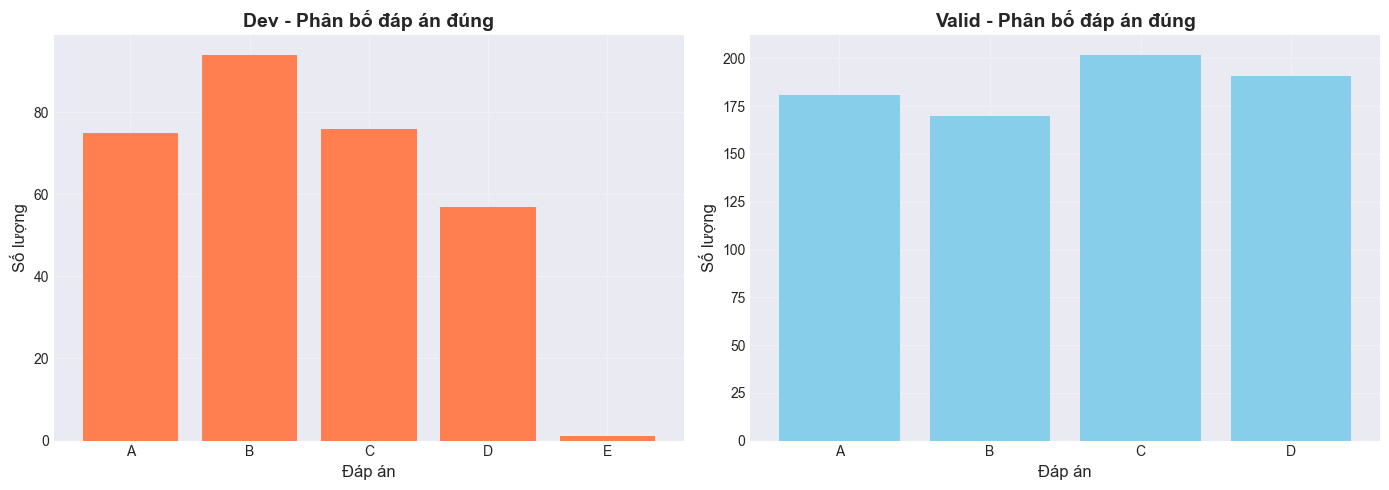


⚖️ Dataset có balanced không?
Dev - Độ lệch chuẩn: 32.02
Valid - Độ lệch chuẩn: 11.85


In [17]:
# Phân tích đáp án đúng (chỉ có trong dev và valid)
dev_answers = [item['answer'] for item in dev_data]
valid_answers = [item['answer'] for item in valid_data]

dev_answer_counts = Counter(dev_answers)
valid_answer_counts = Counter(valid_answers)

print("📊 Phân bố đáp án đúng trong DEV set:")
for answer, count in sorted(dev_answer_counts.items()):
    print(f"  {answer}: {count} câu ({count/len(dev_data)*100:.2f}%)")

print("\n📊 Phân bố đáp án đúng trong VALID set:")
for answer, count in sorted(valid_answer_counts.items()):
    print(f"  {answer}: {count} câu ({count/len(valid_data)*100:.2f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dev
answers_dev = sorted(dev_answer_counts.keys())
counts_dev = [dev_answer_counts[a] for a in answers_dev]
axes[0].bar(answers_dev, counts_dev, color='coral')
axes[0].set_xlabel('Đáp án', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title('Dev - Phân bố đáp án đúng', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Valid
answers_valid = sorted(valid_answer_counts.keys())
counts_valid = [valid_answer_counts[a] for a in answers_valid]
axes[1].bar(answers_valid, counts_valid, color='skyblue')
axes[1].set_xlabel('Đáp án', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].set_title('Valid - Phân bố đáp án đúng', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Kiểm tra balance
print(f"\n⚖️ Dataset có balanced không?")
print(f"Dev - Độ lệch chuẩn: {np.std(counts_dev):.2f}")
print(f"Valid - Độ lệch chuẩn: {np.std(counts_valid):.2f}")

## 5. Phân tích độ dài câu hỏi

📏 Độ dài câu hỏi (ký tự):
Dev - Min: 10, Max: 339, Mean: 83.7, Median: 66.0
Valid - Min: 13, Max: 601, Mean: 91.6, Median: 77.0
Test - Min: 7, Max: 1214, Mean: 111.1, Median: 80.0


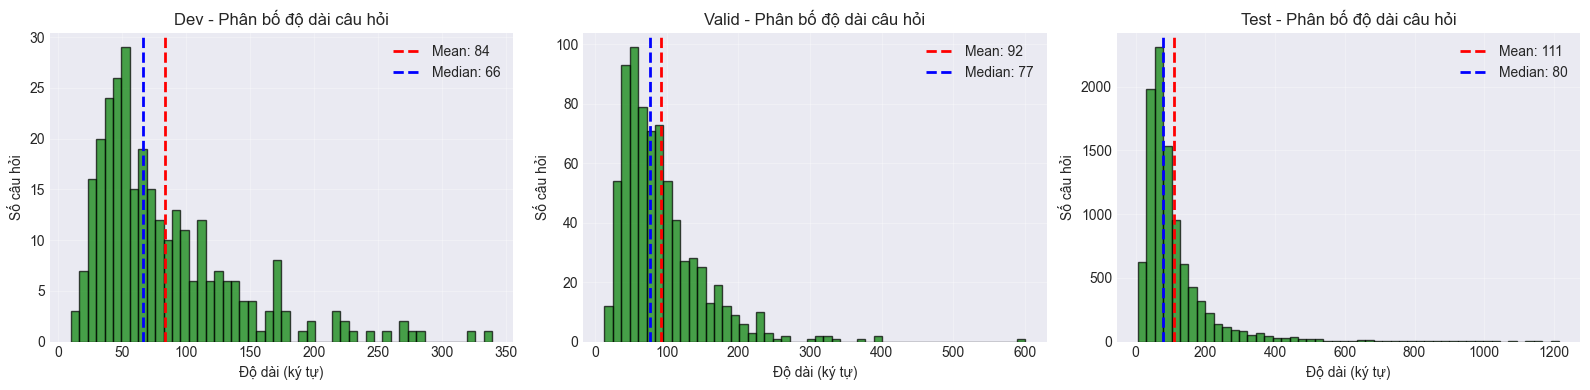

In [18]:
# Phân tích độ dài câu hỏi
def analyze_length(data, field='question'):
    lengths = [len(item[field]) for item in data]
    return lengths

dev_q_lengths = analyze_length(dev_data, 'question')
valid_q_lengths = analyze_length(valid_data, 'question')
test_q_lengths = analyze_length(test_data, 'question')

print("📏 Độ dài câu hỏi (ký tự):")
print(f"Dev - Min: {min(dev_q_lengths)}, Max: {max(dev_q_lengths)}, Mean: {np.mean(dev_q_lengths):.1f}, Median: {np.median(dev_q_lengths):.1f}")
print(f"Valid - Min: {min(valid_q_lengths)}, Max: {max(valid_q_lengths)}, Mean: {np.mean(valid_q_lengths):.1f}, Median: {np.median(valid_q_lengths):.1f}")
print(f"Test - Min: {min(test_q_lengths)}, Max: {max(test_q_lengths)}, Mean: {np.mean(test_q_lengths):.1f}, Median: {np.median(test_q_lengths):.1f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, data, title in zip(axes, 
                            [dev_q_lengths, valid_q_lengths, test_q_lengths],
                            ['Dev', 'Valid', 'Test']):
    ax.hist(data, bins=50, color='green', alpha=0.7, edgecolor='black')
    ax.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(data):.0f}')
    ax.axvline(np.median(data), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(data):.0f}')
    ax.set_xlabel('Độ dài (ký tự)')
    ax.set_ylabel('Số câu hỏi')
    ax.set_title(f'{title} - Phân bố độ dài câu hỏi')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Phân tích độ dài các lựa chọn

📏 Độ dài lựa chọn (ký tự):
Dev - Min: 4, Max: 434, Mean: 31.7
Valid - Min: 4, Max: 476, Mean: 33.1
Test - Min: 4, Max: 527, Mean: 33.5


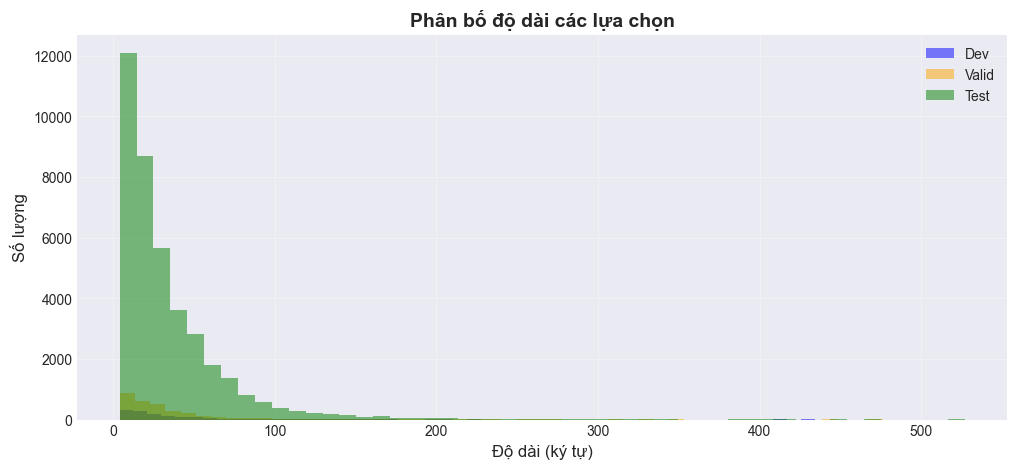

In [19]:
# Phân tích độ dài các lựa chọn
def get_choice_lengths(data):
    all_lengths = []
    for item in data:
        for choice in item['choices']:
            all_lengths.append(len(choice))
    return all_lengths

dev_choice_lengths = get_choice_lengths(dev_data)
valid_choice_lengths = get_choice_lengths(valid_data)
test_choice_lengths = get_choice_lengths(test_data)

print("📏 Độ dài lựa chọn (ký tự):")
print(f"Dev - Min: {min(dev_choice_lengths)}, Max: {max(dev_choice_lengths)}, Mean: {np.mean(dev_choice_lengths):.1f}")
print(f"Valid - Min: {min(valid_choice_lengths)}, Max: {max(valid_choice_lengths)}, Mean: {np.mean(valid_choice_lengths):.1f}")
print(f"Test - Min: {min(test_choice_lengths)}, Max: {max(test_choice_lengths)}, Mean: {np.mean(test_choice_lengths):.1f}")

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(dev_choice_lengths, bins=50, alpha=0.5, label='Dev', color='blue')
ax.hist(valid_choice_lengths, bins=50, alpha=0.5, label='Valid', color='orange')
ax.hist(test_choice_lengths, bins=50, alpha=0.5, label='Test', color='green')
ax.set_xlabel('Độ dài (ký tự)', fontsize=12)
ax.set_ylabel('Số lượng', fontsize=12)
ax.set_title('Phân bố độ dài các lựa chọn', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

## 7. Tính tổng độ dài (câu hỏi + tất cả choices)

In [20]:
# Tổng độ dài (câu hỏi + tất cả choices)
def get_total_lengths(data):
    total_lengths = []
    for item in data:
        q_len = len(item['question'])
        choices_len = sum(len(c) for c in item['choices'])
        total_lengths.append(q_len + choices_len)
    return total_lengths

dev_total = get_total_lengths(dev_data)
valid_total = get_total_lengths(valid_data)
test_total = get_total_lengths(test_data)

print("📏 Tổng độ dài (câu hỏi + tất cả choices) - ký tự:")
print(f"Dev - Min: {min(dev_total)}, Max: {max(dev_total)}, Mean: {np.mean(dev_total):.1f}")
print(f"Valid - Min: {min(valid_total)}, Max: {max(valid_total)}, Mean: {np.mean(valid_total):.1f}")
print(f"Test - Min: {min(test_total)}, Max: {max(test_total)}, Mean: {np.mean(test_total):.1f}")

# Ước lượng số tokens (1 token ≈ 4 chars tiếng Việt)
print(f"\n🔢 Ước lượng số tokens (1 token ≈ 4 chars):")
print(f"Dev - Mean tokens: {np.mean(dev_total)/4:.1f}, Max tokens: {max(dev_total)/4:.1f}")
print(f"Valid - Mean tokens: {np.mean(valid_total)/4:.1f}, Max tokens: {max(valid_total)/4:.1f}")
print(f"Test - Mean tokens: {np.mean(test_total)/4:.1f}, Max tokens: {max(test_total)/4:.1f}")

print(f"\n💡 Gợi ý MAX_SEQ_LENGTH cho training: {int(max(max(dev_total), max(valid_total), max(test_total))/4 * 1.2)} tokens")

📏 Tổng độ dài (câu hỏi + tất cả choices) - ký tự:
Dev - Min: 43, Max: 899, Mean: 209.3
Valid - Min: 51, Max: 1568, Mean: 222.7
Test - Min: 39, Max: 1683, Mean: 244.4

🔢 Ước lượng số tokens (1 token ≈ 4 chars):
Dev - Mean tokens: 52.3, Max tokens: 224.8
Valid - Mean tokens: 55.7, Max tokens: 392.0
Test - Mean tokens: 61.1, Max tokens: 420.8

💡 Gợi ý MAX_SEQ_LENGTH cho training: 504 tokens


## 8. Xem một số câu hỏi dài nhất

In [21]:
# Tìm câu hỏi dài nhất
dev_with_lengths = [(item, len(item['question'])) for item in dev_data]
dev_with_lengths.sort(key=lambda x: x[1], reverse=True)

print("🔍 TOP 3 câu hỏi dài nhất trong DEV set:\n")
for i, (item, length) in enumerate(dev_with_lengths[:3], 1):
    print(f"{'='*80}")
    print(f"#{i} - ID: {item['id']} - Độ dài: {length} ký tự")
    print(f"{'='*80}")
    print(f"Câu hỏi: {item['question'][:300]}{'...' if len(item['question']) > 300 else ''}")
    print(f"\nĐáp án đúng: {item['answer']}")
    print()

🔍 TOP 3 câu hỏi dài nhất trong DEV set:

#1 - ID: 56-0001 - Độ dài: 339 ký tự
Câu hỏi: Theo Nghị định 90/2020/NĐ-CP; 13/8/2020. Tiêu chí “100% cơ quan, tổ chức, đơn vị thuộc thẩm quyền phụ trách, quản lý trực tiếp được đánh giá hoàn thành nhiệm vụ trở lên, trong đó ít nhất 70% hoàn thành tốt hoặc hoàn thành xuất sắc nhiệm vụ” là một trong những tiêu chí xếp loại chất lượng Công chức g...

Đáp án đúng: A

#2 - ID: 48-0004 - Độ dài: 321 ký tự
Câu hỏi: Chủ trương “vận động cải cách văn hóa, xã hội; động viên lòng yêu nước trong nhân dân; đả kích bọn vua quan phong kiến thối nát, đề xướng tư tưởng dân chủ tư sản; thực hiện khai dân trí, chấn dân khí, hậu dân sinh, mở mang dân quyền; phản đối đấu tranh vũ trang và cầu viện nước ngoài”, đại biểu xu h...

Đáp án đúng: A

#3 - ID: 50-0004 - Độ dài: 281 ký tự
Câu hỏi: Số dư đầu tháng của các TK (ĐVT: 1.000 đ): TK 111: 3.000 ; TK 214: 4.000 ; TK 411: 66.000 ; TK 152: X (3.600 kg) ; TK 311: 6.000 ; TK 112: 3.000 ; TK 211: Y. Các số dư còn lại từ 

## 9. Chuyển đổi sang format SFT (JSON-only)

In [22]:
# Hàm chuyển đổi sang format SFT
def convert_to_sft_format(item, include_answer=True):
    """
    Chuyển đổi 1 sample sang format SFT với messages
    """
    # Format câu hỏi
    question_text = item['question']
    choices_text = "\n".join(item['choices'])
    user_content = f"Câu hỏi: {question_text}\n{choices_text}"
    
    # System prompt
    system_content = 'Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {"answer":"A"} hoặc B/C/D.'
    
    messages = [
        {"role": "system", "content": system_content},
        {"role": "user", "content": user_content}
    ]
    
    # Thêm assistant nếu có answer
    if include_answer and 'answer' in item:
        messages.append({
            "role": "assistant",
            "content": f'{{"answer":"{item["answer"]}"}}'
        })
    
    return {"messages": messages}

# Ví dụ chuyển đổi
sample_sft = convert_to_sft_format(dev_data[0])
print("📝 Ví dụ format SFT (JSON-only):")
print(json.dumps(sample_sft, ensure_ascii=False, indent=2))

📝 Ví dụ format SFT (JSON-only):
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Câu hỏi: Nếu GDP bình quân thực tế của năm 2000 là 18,073$ và GDP bình quân thực tế của năm 2001 là 18,635$ thì tỷ lệ tăng trưởng của sản lượng thực tế trong thời kỳ này là bao nhiêu?\nA. 3.0%\nB. 3.1%\nC. 5.62%\nD. 18.0%\nE. 18.6%"
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"B\"}"
    }
  ]
}


## 10. Export Dataset SFT (JSONL)

In [23]:
# Filter: Chỉ giữ câu hỏi có đúng 4 đáp án
def filter_4_choices(data):
    """Filter chỉ giữ câu hỏi có đúng 4 đáp án"""
    filtered = [item for item in data if len(item['choices']) == 4]
    return filtered

print("🔍 Filtering data - chỉ giữ câu hỏi có 4 đáp án...\n")

# Filter dev và valid
dev_filtered = filter_4_choices(dev_data)
valid_filtered = filter_4_choices(valid_data)

print(f"📊 Dev set:")
print(f"   Original: {len(dev_data)} samples")
print(f"   Filtered: {len(dev_filtered)} samples")
print(f"   Removed: {len(dev_data) - len(dev_filtered)} samples ({(len(dev_data) - len(dev_filtered))/len(dev_data)*100:.1f}%)")

print(f"\n📊 Valid set:")
print(f"   Original: {len(valid_data)} samples")
print(f"   Filtered: {len(valid_filtered)} samples")
print(f"   Removed: {len(valid_data) - len(valid_filtered)} samples ({(len(valid_data) - len(valid_filtered))/len(valid_data)*100:.1f}%)")

print(f"\n📊 Total training data:")
print(f"   Original: {len(dev_data) + len(valid_data)} samples")
print(f"   Filtered: {len(dev_filtered) + len(valid_filtered)} samples")
print(f"   Removed: {(len(dev_data) + len(valid_data)) - (len(dev_filtered) + len(valid_filtered))} samples")

# Chuyển đổi sang format SFT và lưu thành JSONL
import os

output_dir = "../data/sft_dataset_vmlu"
os.makedirs(output_dir, exist_ok=True)

# Combine dev + valid đã filter để train
train_sft = [convert_to_sft_format(item) for item in dev_filtered + valid_filtered]

# Lưu thành JSONL
output_path = os.path.join(output_dir, "train_sft_vmlu.jsonl")
with open(output_path, 'w', encoding='utf-8') as f:
    for item in train_sft:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')

print(f"\n✅ Đã export {len(train_sft)} samples (chỉ 4 đáp án) vào: {output_path}")
print(f"📊 Tổng: {len(dev_filtered)} (dev) + {len(valid_filtered)} (valid) = {len(train_sft)} samples")
print(f"\n💡 Dùng file này để train SFT trong notebook chính!")

🔍 Filtering data - chỉ giữ câu hỏi có 4 đáp án...

📊 Dev set:
   Original: 303 samples
   Filtered: 286 samples
   Removed: 17 samples (5.6%)

📊 Valid set:
   Original: 744 samples
   Filtered: 717 samples
   Removed: 27 samples (3.6%)

📊 Total training data:
   Original: 1047 samples
   Filtered: 1003 samples
   Removed: 44 samples

✅ Đã export 1003 samples (chỉ 4 đáp án) vào: ../data/sft_dataset_vmlu\train_sft_vmlu.jsonl
📊 Tổng: 286 (dev) + 717 (valid) = 1003 samples

💡 Dùng file này để train SFT trong notebook chính!


📊 Phân bố đáp án sau khi filter (chỉ 4 đáp án):

Dev set:
  A:  70 câu ( 24.5%)
  B:  87 câu ( 30.4%)
  C:  72 câu ( 25.2%)
  D:  57 câu ( 19.9%)

Valid set:
  A: 170 câu ( 23.7%)
  B: 161 câu ( 22.5%)
  C: 195 câu ( 27.2%)
  D: 191 câu ( 26.6%)


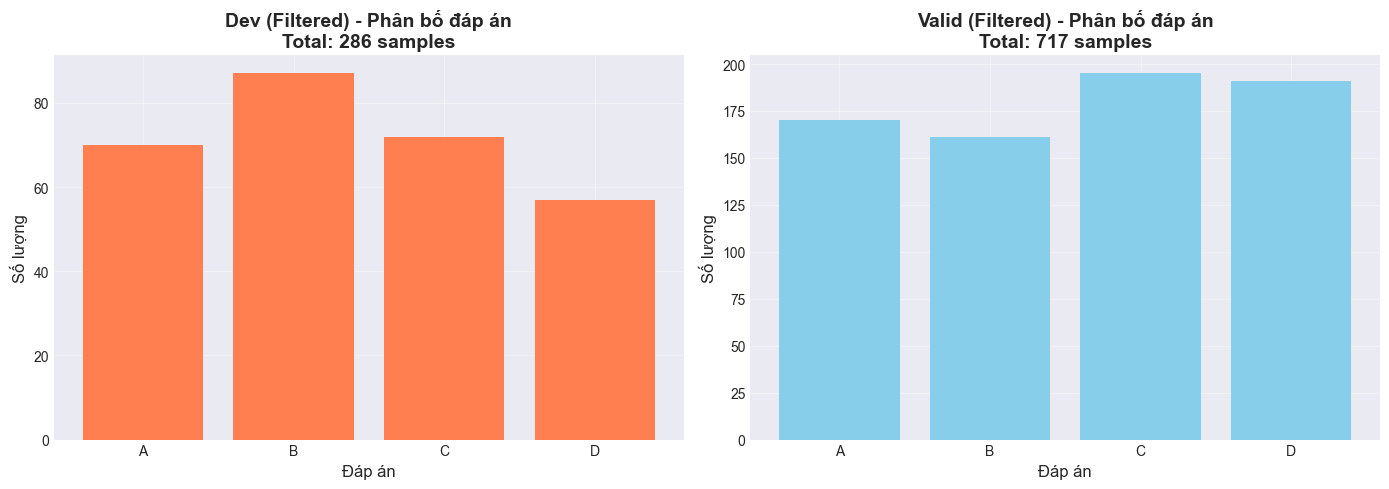

In [24]:
# Kiểm tra phân bố đáp án sau khi filter
dev_filtered_answers = [item['answer'] for item in dev_filtered]
valid_filtered_answers = [item['answer'] for item in valid_filtered]

print("📊 Phân bố đáp án sau khi filter (chỉ 4 đáp án):\n")

print("Dev set:")
dev_filtered_counter = Counter(dev_filtered_answers)
for answer in ['A', 'B', 'C', 'D']:
    count = dev_filtered_counter.get(answer, 0)
    print(f"  {answer}: {count:3d} câu ({count/len(dev_filtered)*100:5.1f}%)")

print("\nValid set:")
valid_filtered_counter = Counter(valid_filtered_answers)
for answer in ['A', 'B', 'C', 'D']:
    count = valid_filtered_counter.get(answer, 0)
    print(f"  {answer}: {count:3d} câu ({count/len(valid_filtered)*100:5.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dev
answers = ['A', 'B', 'C', 'D']
dev_counts = [dev_filtered_counter.get(a, 0) for a in answers]
axes[0].bar(answers, dev_counts, color='coral')
axes[0].set_xlabel('Đáp án', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title(f'Dev (Filtered) - Phân bố đáp án\nTotal: {len(dev_filtered)} samples', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Valid
valid_counts = [valid_filtered_counter.get(a, 0) for a in answers]
axes[1].bar(answers, valid_counts, color='skyblue')
axes[1].set_xlabel('Đáp án', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].set_title(f'Valid (Filtered) - Phân bố đáp án\nTotal: {len(valid_filtered)} samples', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 📋 Tổng kết

### Key Findings:
1. **Số lượng**: Dev (~330 samples), Valid (~815 samples), Test (~10,000 samples)
2. **Format**: Câu hỏi trắc nghiệm với 4-5 lựa chọn (A/B/C/D/E)
3. **Filtered**: Chỉ giữ câu hỏi có đúng 4 đáp án (A/B/C/D)
4. **Test set**: KHÔNG có đáp án → dùng để submit prediction
5. **Độ dài**: Câu hỏi trung bình ~150-200 ký tự, tổng ~400-500 ký tự

### Bước tiếp theo:
1. ✅ Đã filter và export dataset SFT format → `data/sft_dataset_vmlu/train_sft_vmlu.jsonl`
2. ✅ Chỉ giữ câu hỏi có 4 đáp án (A/B/C/D)
3. 🔄 Sử dụng file này để train trong notebook chính
4. 🎯 Test trên test set và tạo file submission
5. 📤 Submit lên hệ thống chấm điểm

### Tips cho Training:
- `MAX_SEQ_LENGTH`: ~600-800 tokens (an toàn)
- Dataset đã được filter chỉ giữ 4 đáp án
- Combine dev + valid làm training set
- Có thể thêm data augmentation nếu cần
- Focus vào format output chính xác: `{"answer":"A"}` hoặc B/C/D

### ⚠️ Lưu ý:
- Dataset gốc có câu hỏi 5 đáp án (E) đã bị loại bỏ
- Nếu cần train với 5 đáp án, xóa bỏ bước filter